# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import statsmodels.api as sm
from scipy.stats import linregress
from pprint import pprint
from sklearn.linear_model import LinearRegression


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
lats = []
longs = []
temps = []
feels_like = []
humidities = []
pressures = []
speeds = []
cloudiness = []
cities_found = []

for x in range(len(cities)):
    city = cities[x]
    
    units = "Imperial"
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        try:
            # Convert Raw Data to DataFrame
            lat = data["coord"]["lat"]
            long = data["coord"]["lon"]
            temp = data["main"]["temp"]
            feel_like = data["main"]["feels_like"]
            humidity = data["main"]["humidity"]
            pressure = data["main"]["pressure"]
            speed = data["wind"]["speed"]
            cloud = data["clouds"]["all"]
            city_found = data["name"]
            
            
            lats.append(lat)
            longs.append(long)
            temps.append(temp)
            feels_like.append(feel_like)
            humidities.append(humidity)
            pressures.append(pressure)
            speeds.append(speed)
            cloudiness.append(cloud)
            cities_found.append(city_found)
            
        except Exception as e:
            print(f"The exception for city {city} is: {e}")
        
    elif response.status_code == 404:
        print(f"Missing data for {city} in OpenWeatherAPI")
    else:
        print(response.status_code)
        print("Error")
        
        
    time.sleep(1.2)
    
# make the dataframe
df = pd.DataFrame()
df["City"] = cities_found
df["Latitude"] = lats
df["Longitude"] = longs
df["Temperature"] = temps
df["Feels Like"] = feels_like
df["Humidity"] = humidities
df["Pressure"] = pressures
df["Wind Speed"] = speeds
df["Cloudiness"] = cloudiness

# Display the DataFrame
df.head(10)

Missing data for umzimvubu in OpenWeatherAPI
Missing data for saleaula in OpenWeatherAPI
Missing data for bid in OpenWeatherAPI
Missing data for belushya guba in OpenWeatherAPI
Missing data for grand river south east in OpenWeatherAPI
Missing data for illoqqortoormiut in OpenWeatherAPI
Missing data for litoral del san juan in OpenWeatherAPI
Missing data for nizhneyansk in OpenWeatherAPI
Missing data for amderma in OpenWeatherAPI
Missing data for khonuu in OpenWeatherAPI
Missing data for taolanaro in OpenWeatherAPI
Missing data for aflu in OpenWeatherAPI
Missing data for kerteh in OpenWeatherAPI
Missing data for artyk in OpenWeatherAPI
Missing data for ngukurr in OpenWeatherAPI
Missing data for marcona in OpenWeatherAPI
Missing data for barentsburg in OpenWeatherAPI
Missing data for tsihombe in OpenWeatherAPI
Missing data for meyungs in OpenWeatherAPI
Missing data for pandelys in OpenWeatherAPI
Missing data for sentyabrskiy in OpenWeatherAPI
Missing data for bur gabo in OpenWeatherAPI
M

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Rikitea,-23.12,-134.97,77.13,73.98,77,1018,18.57,54
1,Vangaindrano,-23.35,47.60,74.14,78.49,86,1013,5.53,57
2,Hobart,-42.88,147.33,58.51,55.56,82,1016,6.93,20
3,Redlands,34.06,-117.18,63.86,57.85,31,1020,4.50,5
4,Port Alfred,-33.59,26.89,73.00,79.18,93,1007,3.36,100
5,Jamestown,42.10,-79.24,33.73,27.99,86,1014,3.36,90
6,Port Elizabeth,-33.92,25.57,73.40,77.94,94,1009,6.93,100
7,Hilo,19.73,-155.09,71.67,72.81,78,1022,6.93,90
8,St. Pete Beach,27.73,-82.74,61.93,52.27,42,1017,12.75,1
9,Arraial do Cabo,-22.97,-42.03,79.57,83.52,83,1011,10.29,0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.


In [5]:
df.to_csv(output_data_file, index=False)

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Rikitea,-23.12,-134.97,77.13,73.98,77,1018,18.57,54
1,Vangaindrano,-23.35,47.60,74.14,78.49,86,1013,5.53,57
2,Hobart,-42.88,147.33,58.51,55.56,82,1016,6.93,20
3,Redlands,34.06,-117.18,63.86,57.85,31,1020,4.50,5
4,Port Alfred,-33.59,26.89,73.00,79.18,93,1007,3.36,100


In [7]:
df.describe()

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,18.193846,15.653966,51.049299,47.296855,72.907692,1015.892308,7.755385,54.634188
std,33.491330,87.819803,31.970353,36.825422,19.580577,13.366553,5.493115,38.870344
min,-54.800000,-175.200000,-38.310000,-49.560000,15.000000,857.000000,0.250000,0.000000
25%,-11.550000,-60.630000,33.800000,25.950000,65.000000,1009.000000,3.620000,19.000000
50%,21.430000,19.360000,61.860000,56.170000,78.000000,1013.000000,6.220000,66.000000
75%,45.020000,86.180000,76.820000,78.690000,87.000000,1020.000000,10.290000,90.000000
max,78.220000,179.320000,93.490000,97.110000,100.000000,1063.000000,39.150000,100.000000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

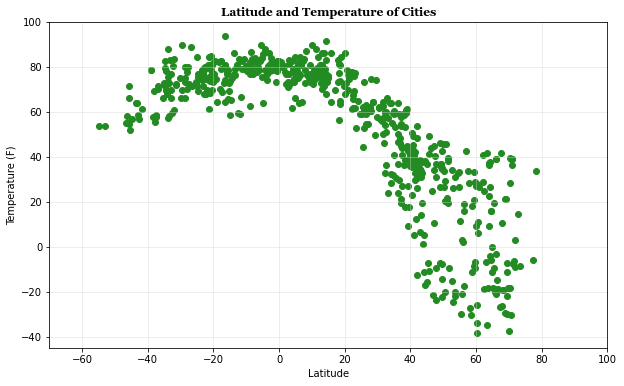

In [8]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "forestgreen")
plt.title("Latitude and Temperature of Cities", fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-70,100)
plt.grid(color="lightgrey", alpha = 0.5)

plt.savefig("output_data/fig1.png")

plt.show()

## Latitude vs. Humidity Plot

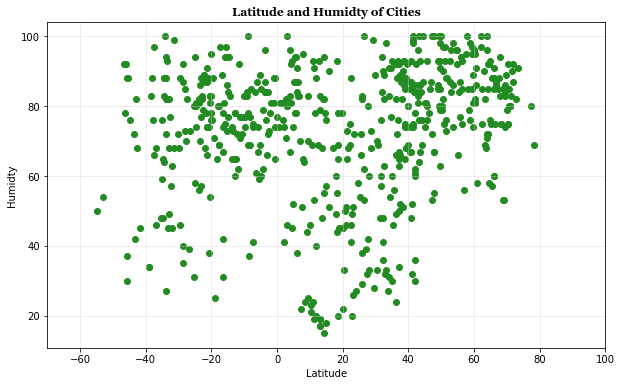

In [9]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "forestgreen")
plt.title("Latitude and Humidty of Cities", fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude")
plt.ylabel("Humidty")
plt.xlim(-70,100)
plt.grid(color="lightgrey", alpha = 0.5)

plt.savefig("output_data/fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

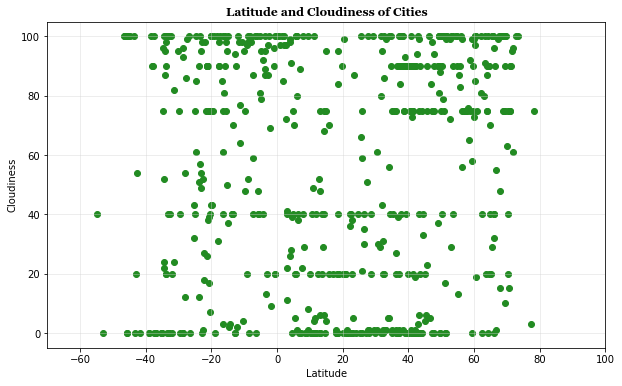

In [10]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "forestgreen")
plt.title("Latitude and Cloudiness of Cities", fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-70,100)
plt.grid(color="lightgrey", alpha = 0.5)

plt.savefig("output_data/fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

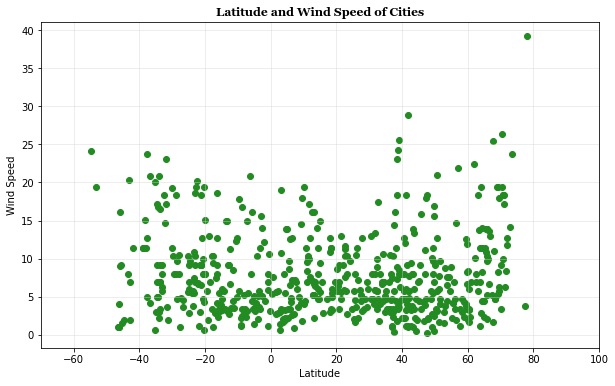

In [11]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "forestgreen")
plt.title("Latitude and Wind Speed of Cities", fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-70,100)
plt.grid(color="lightgrey", alpha = 0.5)

plt.savefig("output_data/fig4.png")

plt.show()

## Linear Regression

In [12]:
#linear regression function
def plot_lineregres(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values, color = "forestgreen")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
north_hemi_df = df.loc[(df["Latitude"] >= 0)]
south_hemi_df = df.loc[(df["Latitude"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6985073840652484


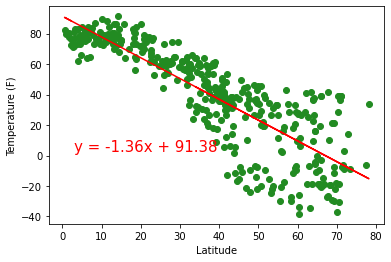

In [14]:
plot_lineregres(north_hemi_df.Latitude, north_hemi_df.Temperature, 'Temperature (F)',(3,3))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3475832847409921


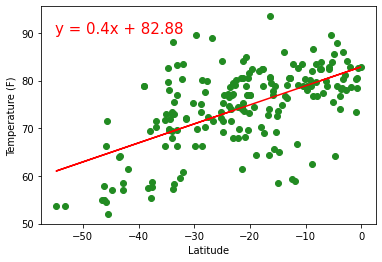

In [27]:
plot_lineregres(south_hemi_df.Latitude, south_hemi_df.Temperature, 'Temperature (F)',(-55,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14300844003686003


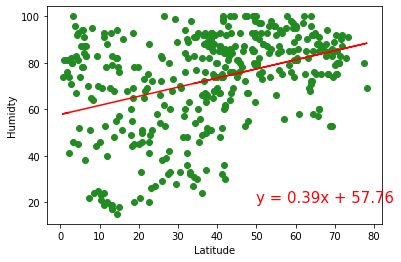

In [28]:
plot_lineregres(north_hemi_df.Latitude, north_hemi_df.Humidity, 'Humidty',(50,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03004615863084837


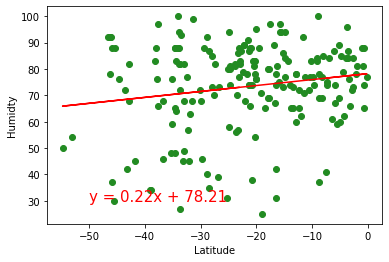

In [30]:
plot_lineregres(south_hemi_df.Latitude, south_hemi_df.Humidity, 'Humidty',(-50,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08601208576795584


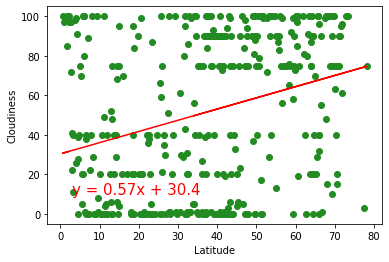

In [31]:
plot_lineregres(north_hemi_df.Latitude, north_hemi_df.Cloudiness, 'Cloudiness',(3,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02736031888095934


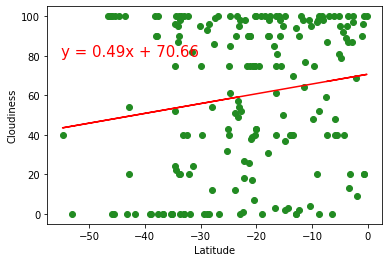

In [32]:
plot_lineregres(south_hemi_df.Latitude, south_hemi_df.Cloudiness, 'Cloudiness',(-55,80))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.029852127395488363


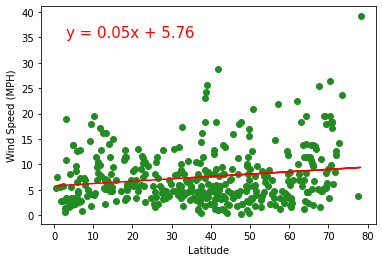

In [33]:
plot_lineregres(north_hemi_df.Latitude, north_hemi_df["Wind Speed"], 'Wind Speed (MPH)',(3,35))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0461339374309856


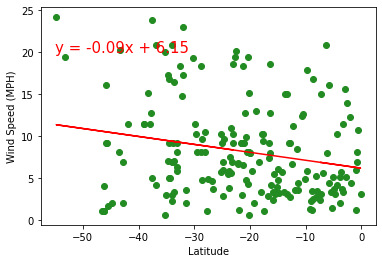

In [35]:
plot_lineregres(south_hemi_df.Latitude, south_hemi_df["Wind Speed"], 'Wind Speed (MPH)',(-55,20))